<a href="https://colab.research.google.com/github/ilu25/2023-02-ML-Novice-Study/blob/main/%5Bweek5%5D/%5BMLNovice%5D%EC%A1%B0%EC%84%B8%EC%98%81_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)  # input: 3차원, target: 1차원(0~9 들어있음)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


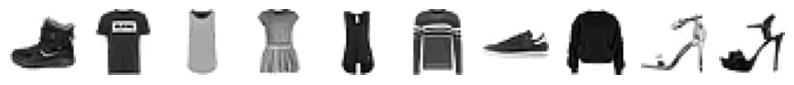

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')  # 물체가 보이는 부분: 높은 숫자(255) -> 눈으로 볼 때 검은색으로 반전해줌
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


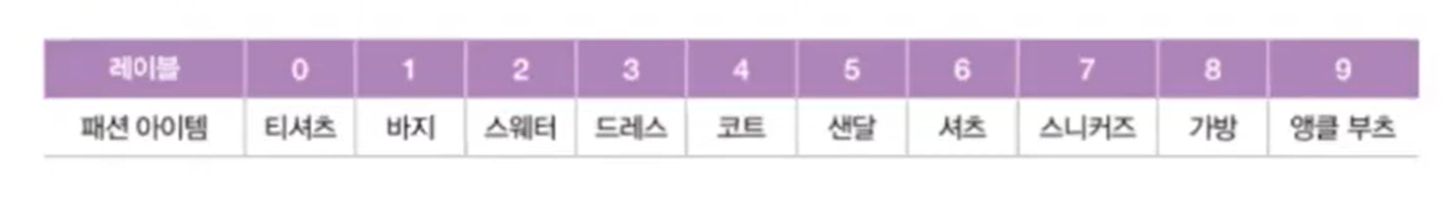

## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
train_scaled = train_input / 255.0    # 0~255 -> 0~1
train_scaled = train_scaled.reshape(-1, 28*28)  # 3차원 -> 2차원

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)  # 다중 분류 시 OVR(OVA) 사용

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))    # 검증 점수 (test라고 써있어서 헷갈리지 말기)

0.8196000000000001


## 인공신경망

### 텐서플로와 케라스

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split  # 교차검증이 아닌 검증 세트 따로 마련

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
# Dense: 밀집층, 완전연결층 (fully connected layer)
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)   # 층을 쌓아 모델 생성

## 인공신경망으로 패션 아이템 분류하기

In [ ]:
# compile: 설정 / 이진분류 (binary_crossentropy) & 다중분류 (categorical_crossentropy)
# sparse: 원핫인코딩이 아닌 정수를 그대로 사용할 경우
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # metrics: 측정 지표

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5) # loss는 줄어들고 정확도는 올라감

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4280 - accuracy: 0.8555


In [ ]:
model.evaluate(val_scaled, val_target)  # 검증 평가

375/375 [==============================] - 2s 3ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262548327445984, 0.8464999794960022]

# 심층 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# activation 지정 필수 (안 하면 활성화 함수 제공 안 됨)
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))  # 은닉층
dense2 = keras.layers.Dense(10, activation='softmax')   # 출력층

## 심층 신경망 만들기

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()   # 모델 구조 출력 (output의 None: batchsize 자유롭게 둠 - 기본 32)
# Param: 각 층의 가중치&절편(=모델 파라미터) 개수 ex) 784 * 100 + 100 = 78500

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 층을 추가하는 다른 방법

In [ ]:
# dense 객체 만들지 않고 바로 전달 (객체 가지고 다른 역할하는 게 없어서)
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 가장 많이 사용! (if문으로 동적 조절 가능)
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 12s 4ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3344 - accuracy: 0.8782


## 렐루 활성화 함수

In [ ]:
model = keras.Sequential()
# 편의 및 전처리 위한 층: 28x28 -> 784 1차원 배열로 (지정 안 해도 자동으로 Flatten)
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5290 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3920 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3525 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3301 - accuracy: 0.8821
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3141 - accuracy: 0.8867


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3683 - accuracy: 0.8726


[0.3683287501335144, 0.8725833296775818]

## 옵티마이저

In [ ]:
# sgd: 확률적 경사 하강법 (실제로는 미니 배치 경사 하강법)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# 위의 방법과 완전히 동일
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)   # 기본 0.01 (변경 시 객체화 필요)

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)   # 기본 0 / False

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# adam의 기본 learning rate: 0.001
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5198 - accuracy: 0.8176
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3910 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3539 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3277 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8874


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.3428 - accuracy: 0.8737


[0.34282276034355164, 0.8737499713897705]

# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)    # 객체 이용

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


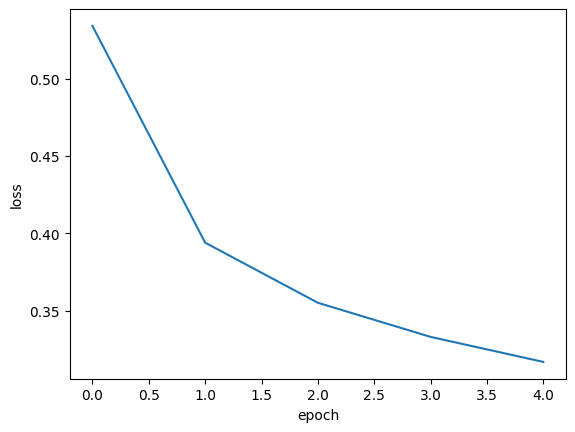

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

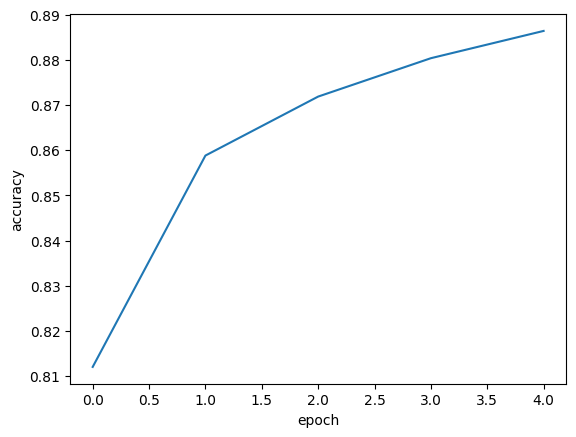

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
# 더 많이 할수록 복잡, 훈련 세트에 더 적합
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

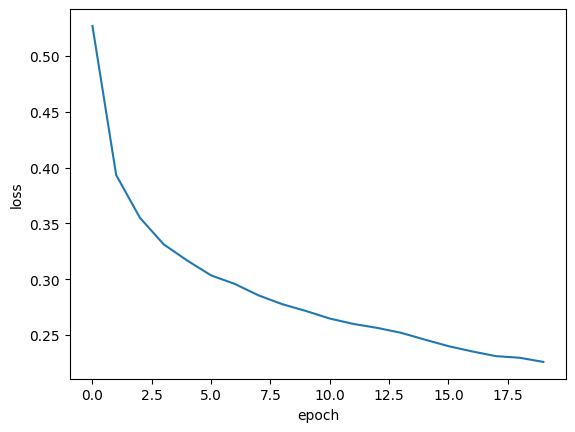

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))  # 검증 데이터 추가

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


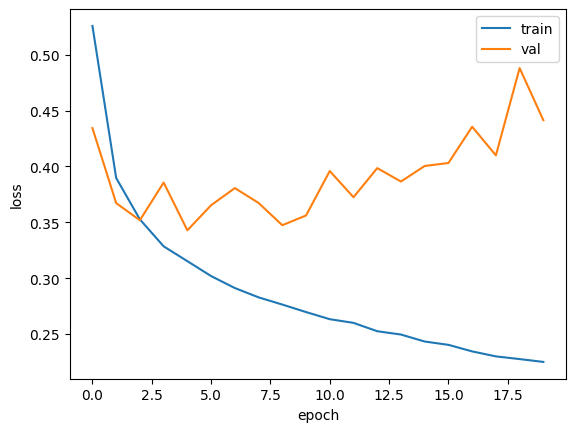

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])     # 과대적합
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

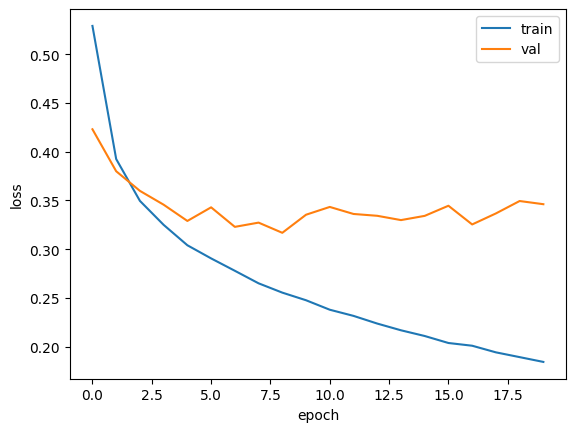

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [15]:
model = model_fn(keras.layers.Dropout(0.3))   # 드롭아웃 층 추가 (30%의 뉴런 무시)

model.summary()   # 은닉층과 크기 동일, 학습 파라미터 X

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

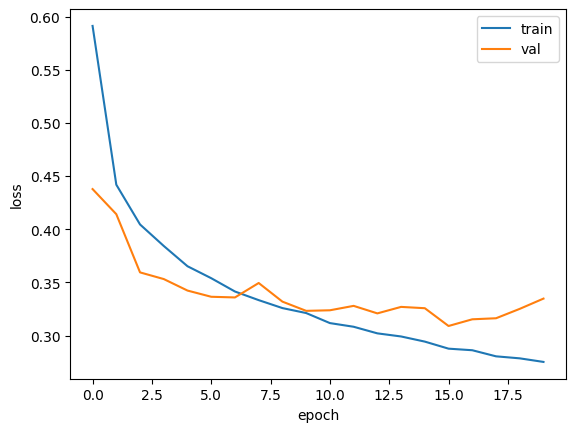

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()    # 과대적합 완화

## 모델 저장과 복원

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [19]:
model.save_weights('model-weights.h5')   # 모델 구조는 저장하지 않고 가중치만 저장

In [20]:
model.save('model-whole.h5')    # 모델 구조와 가중치 모두 저장 (fn() 함수 필요 없어짐)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Dec  4 02:26 model-weights.h5
-rw-r--r-- 1 root root 981176 Dec  4 02:27 model-whole.h5


In [22]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [23]:
import numpy as np

# 각 샘플마다 10개의 확률 반환 -> 가장 큰 확률값의 인덱스를 구해서 예측
# axis = 0 -> 행 따라 계산 / 1 -> 열 따라 계산 / -1 -> 마지막 인덱스 (2차원이라 axis = 1과 동일)
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))    # T: 1, F: 0

375/375 [==============================] - 1s 4ms/step
0.8774166666666666


In [25]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)    # loss, accuracy

375/375 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8774


[0.33339494466781616, 0.8774166703224182]

## 콜백
: 검증 데이터 손실이 커지기 직전에 훈련을 멈추고 저장

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',  # 저장할 파일 이름
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [27]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8850


[0.31854018568992615, 0.8849999904632568]

In [28]:
# 조기 종료
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
# patience: 다시 감소할 수 있으니 지켜볼 에포크 개수
# restore_best_weights: 최상의 가중치 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [29]:
print(early_stopping_cb.stopped_epoch)  # patience 빼면 8번 에포크

10


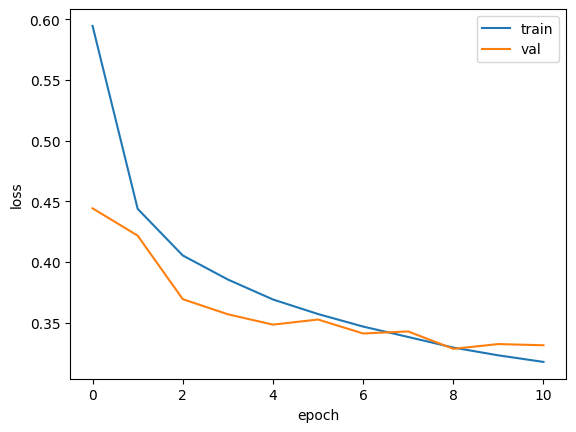

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8795


[0.3285670280456543, 0.8794999718666077]